In [7]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
import json
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import sys
from pprint import pprint
from collections import Counter

client_credentials_manager = SpotifyClientCredentials(client_id='3ef39dfa962c41cea5f23b2c82f5476f', client_secret='1a85a7e5c3824be5a4f34b8b82be84fc')
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

#NEED TO BRING IN CSV TO MAKE DATA VISUALIZATION WITH NEW DATAFRAMES FOR GENRE AND POPULARITY
#bb_500_path = Path('Data/clean_bb_500.csv')
#bb_500_path_api = pd.read_csv(bb_500_path)
#bb_500_path_api.head()

In [8]:
# importing raw csv
tocm_df = pd.read_csv(Path("Data/tocm_rank.csv"))
genre_df=tocm_df
genre_df["Artist ID"]=""
genre_df["Genres"]=""
genre_df["Popularity"]=""
#line below to limit results and can be deactivated once code is working
genre_df = genre_df.loc[(genre_df["time_on_chart"] >50) , :]
genre_df.head()

,song,performer,song_id,time_on_chart,chart_debut,Artist ID,Genres,Popularity
0,Heat Waves,Glass Animals,Heat WavesGlass Animals,91,2021-01-16,,,
1,Blinding Lights,The Weeknd,Blinding LightsThe Weeknd,90,2019-12-14,,,
2,Radioactive,Imagine Dragons,RadioactiveImagine Dragons,87,2012-08-18,,,
3,Sail,AWOLNATION,SailAWOLNATION,79,2011-09-03,,,
4,I'm Yours,Jason Mraz,I'm YoursJason Mraz,76,2008-05-03,,,


In [9]:
# Iterate over rows in the DataFrame
for index, row in genre_df.iterrows():
    artist = row["performer"]
    
    # Search for the artist on Spotify
    result = sp.search(q=artist, type='artist', limit=1)
    
    if result['artists']['items']:
        artist_info = result['artists']['items'][0]
        artist_id = artist_info['id']
        
        # Update the DataFrame with the artist ID
        genre_df.loc[index, "Artist ID"] = artist_id
        
        # Create the artist URI
        urn = f"spotify:artist:{artist_id}"
        #print(urn)
        
        # Fetch artist details
        artist_search = sp.artist(artist_id)
        
        # Update the DataFrame with the genre and popularity
        genres = artist_search.get('genres', [])
        genres = artist_search.get('genres', [])
        genre_df.at[index, "Genres"] = ', '.join(genres) if genres else "Unknown"
        
        popularity = artist_search.get('popularity', 0)
        genre_df.loc[index, "Popularity"] = popularity
        
        #Print the genre and popularity
        pprint(genres)
        print(f"Popularity: {popularity}")
    else:
        print(f"No results found for artist: {artist}")
        
# Display the updated DataFrame
genre_df.head()

['gauze pop', 'indietronica', 'modern rock', 'pov: indie', 'shiver pop']
Popularity: 78
['canadian contemporary r&b', 'canadian pop', 'pop']
Popularity: 94
['modern rock', 'pop', 'rock']
Popularity: 88
['la indie', 'modern alternative rock', 'modern rock', 'rock', 'stomp pop']
Popularity: 62
['acoustic pop', 'dance pop', 'neo mellow', 'pop']
Popularity: 71
['pop', 'r&b', 'rap']
Popularity: 89
['contemporary country', 'country', 'country dawn', 'country road']
Popularity: 63
['piano rock', 'pop']
Popularity: 85
['dance pop', 'pop', 'pop rap']
Popularity: 67
['classic oklahoma country']
Popularity: 91
['canadian contemporary r&b', 'canadian pop', 'pop']
Popularity: 94
['dance pop', 'pop', 'urban contemporary']
Popularity: 77
['british soul', 'pop', 'pop soul', 'uk pop']
Popularity: 86
['alaska indie',
 'ectofolk',
 'lilith',
 'permanent wave',
 'pop rock',
 'singer-songwriter']
Popularity: 57
['classic oklahoma country',
 'contemporary country',
 'country',
 'country dawn',
 'dance pop',

,song,performer,song_id,time_on_chart,chart_debut,Artist ID,Genres,Popularity
0,Heat Waves,Glass Animals,Heat WavesGlass Animals,91,2021-01-16,4yvcSjfu4PC0CYQyLy4wSq,"gauze pop, indietronica, modern rock, pov: ind...",78
1,Blinding Lights,The Weeknd,Blinding LightsThe Weeknd,90,2019-12-14,1Xyo4u8uXC1ZmMpatF05PJ,"canadian contemporary r&b, canadian pop, pop",94
2,Radioactive,Imagine Dragons,RadioactiveImagine Dragons,87,2012-08-18,53XhwfbYqKCa1cC15pYq2q,"modern rock, pop, rock",88
3,Sail,AWOLNATION,SailAWOLNATION,79,2011-09-03,4njdEjTnLfcGImKZu1iSrz,"la indie, modern alternative rock, modern rock...",62
4,I'm Yours,Jason Mraz,I'm YoursJason Mraz,76,2008-05-03,4phGZZrJZRo4ElhRtViYdl,"acoustic pop, dance pop, neo mellow, pop",71


In [10]:
sorted_df = genre_df.sort_values(by='Popularity', ascending=False)
most_popular_song = sorted_df.iloc[0]['song']
most_popular_artist = sorted_df.iloc[0]['performer']
print(f'The most popular song based on Popularity score is {most_popular_song} by {most_popular_artist}.')
sorted_df.head()

The most popular song based on Popularity score is Anti-Hero by Taylor Swift.


,song,performer,song_id,time_on_chart,chart_debut,Artist ID,Genres,Popularity
60,Anti-Hero,Taylor Swift,Anti-HeroTaylor Swift,54,2022-11-05,06HL4z0CvFAxyc27GXpf02,pop,100
1,Blinding Lights,The Weeknd,Blinding LightsThe Weeknd,90,2019-12-14,1Xyo4u8uXC1ZmMpatF05PJ,"canadian contemporary r&b, canadian pop, pop",94
10,Save Your Tears,The Weeknd & Ariana Grande,Save Your TearsThe Weeknd & Ariana Grande,67,2021-01-09,1Xyo4u8uXC1ZmMpatF05PJ,"canadian contemporary r&b, canadian pop, pop",94
22,Circles,Post Malone,CirclesPost Malone,61,2019-09-14,246dkjvS1zLTtiykXe5h60,"dfw rap, melodic rap, pop, rap",93
89,Better Now,Post Malone,Better NowPost Malone,52,2018-05-12,246dkjvS1zLTtiykXe5h60,"dfw rap, melodic rap, pop, rap",93


In [11]:
#count the total genres listed for each row
count_genre_df = pd.DataFrame(genre_df)

#split the genre into seperate entries 
genre_series = count_genre_df['Genres'].str.split(', ', expand=True).stack()

#new DF
genre_count_df = pd.DataFrame(genre_series, columns=['Genre'])

#Count the occurances
genre_count = genre_count_df['Genre'].value_counts()

#convert to new DF 
final_count_df = genre_count.reset_index()
final_count_df.columns = ['Genre', 'Count']

print(final_count_df)

                   Genre  Count
0                    pop     49
1   contemporary country     17
2               pop rock     13
3                 uk pop     12
4              dance pop     12
..                   ...    ...
89                motown      1
90         rock-and-roll      1
91           baroque pop      1
92    modern country pop      1
93          ohio hip hop      1

[94 rows x 2 columns]


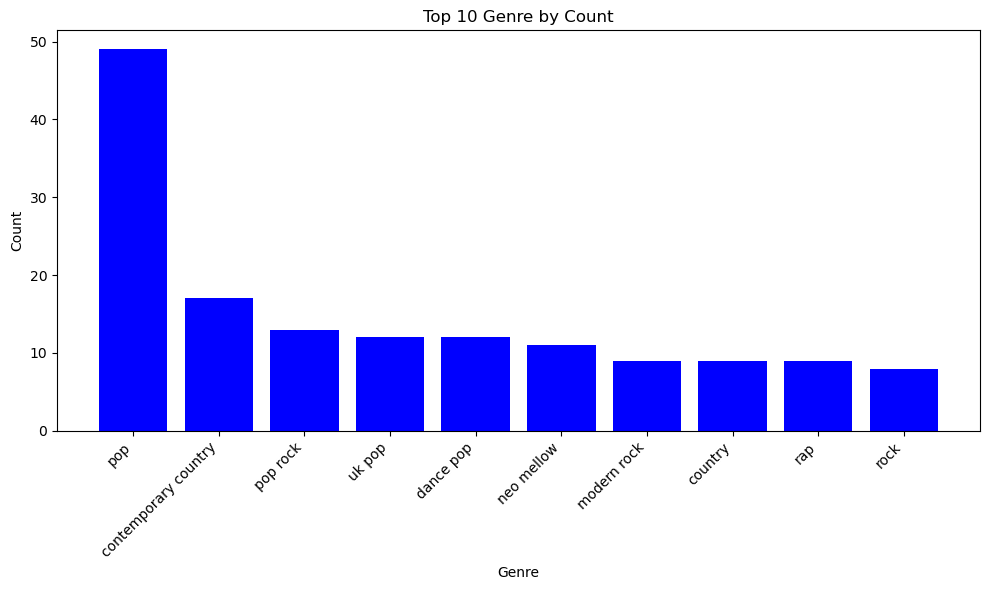

In [14]:
top_10_genres = final_count_df.head(10)

plt.figure(figsize=(10, 6)) 
plt.bar(top_10_genres['Genre'], top_10_genres['Count'], color='blue')

plt.title('Top 10 Genre by Count')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show plot
plt.savefig("output_data/100_genre_barchart.png")
plt.tight_layout()
plt.show()